## Columbia University
### ECBM E4040 Neural Networks and Deep Learning. Fall 2022.

## **Task 1: XOR** (50%)

In [43]:
# Import modules
from __future__ import print_function
import tensorflow as tf

physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print('Using GPU(0):', physical_devices[0])
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
else:
    print('Using CPU')

import numpy as np
from numpy.random import shuffle
import time
import matplotlib.pyplot as plt

# Plot configurations
%matplotlib inline

# Notebook auto reloads code. (Ref: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython)
%load_ext autoreload
%autoreload 2
print(tf.__version__)

Using CPU
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.8.0


##  Part 1: Backpropagation through time (10%)

**Question:** Consider some input data $x_1, x_2$ and groud truth $p_1, p_2$ (the indices denote different time steps), a simple RNN network is shown in the following figure. 

![bptt](./img/bptt2.jpg)

Here, $w_x, w_h, b_1, w, b_2 \in R$ are scalar parameters. Loss function is **mean squared error (MSE)**. 

<font color="red"><strong>TODO:</strong></font>

Assume the input $(x_1, x_2) = (1, -1)$, ground truth $(p_1, p_2) = (0, 1)$, $h_0 = 0$, and $(w_x, w_h, b_1, w, b_2) = (1, -2, 3, 2, 1)$, derive both the forward and backward pass (keep $4$ digits after the decimal). 

<font color="red"><strong>Hint:</strong></font> The sigmoid function and its derivative

$$
\sigma (x) = \frac{1}{1 + e^{-x}}, \quad
\nabla_x \sigma (x) = \frac{e^{-x}}{1 + e^{-x}} = \sigma (x) (1 - \sigma (x))
$$

- Derive the equations and intermediate variables first before plugging in values, don't just fill in the answers
- Use latex style equations
- You derivations don't need to be wrapped with special color :)

<font color="red"><strong>Asnwer:</strong></font>

$$\text{Your Derivations Here.}$$
$(x_1, x_2) = (1, -1)$
$(p_1, p_2) = (0, 1)$, and $(w_x, w_h, b_1, w, b_2) = (1, -2, 3, 2, 1) \\ $
$h_0 = 0 \\ $ 
$h_1 = \sigma (w_x*x_1 + w_h*h_0 + b1) = \sigma (4) = 0.982 \\ $
$y_1 = \sigma (w*h_1 + b2) = \sigma (2.964) = 0.9509 \\ $
$h_2 = \sigma (w_x*x_2 + w_h*h_1 + b1) = \sigma (0.036) = 0.509 \\ $
$y_2 = \sigma (w*h_2 + b2) = \sigma (2.0179) = 0.8827 \\ $

- Loss function for time t

$ L_t = 1/2(y_t -p_t)^2 \\ $ 
$$ \frac{\partial L_1}{\partial w_x} = \frac{\partial L_1}{\partial y_1} \frac{\partial y_1}{\partial h_1} \frac{\partial h_1}{\partial w_x} \\ $$
$$\frac{\partial L_1}{\partial w_x} = (y_1 - p_1)*y_1(1- y_1)*w*h_1(1- h_1)*x_1$$
$$\frac{\partial L_1}{\partial w_x} = 0.0016$$
$$ \frac{\partial L_2}{\partial w_x} = \frac{\partial L_2}{\partial y_2} \frac{\partial y_2}{\partial h_2} \frac{\partial h_2}{\partial w_x} \\ $$
$$\frac{\partial L_2}{\partial w_x} = (y_2 - p_2)*y_2(1- y_2)*w*h_2(1- h_2)*x_2$$
$$\frac{\partial L_2}{\partial w_x} = 0.0063$$
$$ \nabla_{w_x} L = \frac{\partial L_1}{\partial w_x}  + \frac{\partial L_2}{\partial w_x} $$
$$ \nabla_{w_x} L = 0.0079$$

$$ \frac{\partial L_1}{\partial w_h} = \frac{\partial L_1}{\partial y_1} \frac{\partial y_1}{\partial h_1} \frac{\partial h_1}{\partial w_h} \\ $$
$$ \frac{\partial L_1}{\partial w_h} = (y_1 - p_1)*y_1(1- y_1)*w*h_1(1- h_1)*h_0$$
$$ \frac{\partial L_1}{\partial w_h} = 0 $$

$$ \frac{\partial L_2}{\partial w_h} = \frac{\partial L_2}{\partial y_2} \frac{\partial y_2}{\partial h_2} \frac{\partial h_2}{\partial w_h} \\ $$
$$ \frac{\partial L_2}{\partial w_h} = (y_2 - p_2)*y_2(1- y_2)*w*h_2(1- h_2)*h_1$$
$$ \frac{\partial L_2}{\partial w_h} = -0.0060$$
$$\nabla_{w_h} L = \frac{\partial L_1}{\partial w_h} + \frac{\partial L_2}{\partial w_h} $$
$$\nabla_{w_h} L = -0.0060$$

$$ \frac{\partial L_1}{\partial b_1} = \frac{\partial L_1}{\partial y_1} \frac{\partial y_1}{\partial h_1} \frac{\partial h_1}{\partial b_1} \\ $$
$$ \frac{\partial L_1}{\partial b_1} = (y_1 - p_1)*y_1(1- y_1)*w*h_1(1- h_1)$$
$$ \frac{\partial L_1}{\partial b_1} = 0.0016$$

$$ \frac{\partial L_2}{\partial b_1} = \frac{\partial L_2}{\partial y_2} \frac{\partial y_2}{\partial h_2} \frac{\partial h_2}{\partial b_1} $$
$$ \frac{\partial L_2}{\partial b_1} = (y_2 - p_2)*y_2(1- y_2)*w*h_2(1- h_2)$$
$$ \frac{\partial L_2}{\partial b_1} = -0.0060$$
$$\nabla_{b_1} L = \frac{\partial L_1}{\partial b_1} + \frac{\partial L_2}{\partial b_1} $$
$$\nabla_{b_1} L = -0.0044$$

$$ \frac{\partial L_1}{\partial w} = \frac{\partial L_1}{\partial y_1} \frac{\partial y_1}{\partial w} $$
$$ \frac{\partial L_1}{\partial b_1} = (y_1 - p_1)*y_1(1- y_1)*h_1$$
$$ \frac{\partial L_1}{\partial b_1} = 0.0436$$
 
$$ \frac{\partial L_2}{\partial w} = \frac{\partial L_2}{\partial y_2} \frac{\partial y_2}{\partial w} $$
$$ \frac{\partial L_2}{\partial w} = (y_2 - p_2)*y_2(1- y_2)*h_2$$
$$ \frac{\partial L_2}{\partial w} = 0.0062$$
$$ \nabla_{w} L = 0.0374$$

$$ \frac{\partial L_1}{\partial b_2} = \frac{\partial L_1}{\partial y_1} \frac{\partial y_1}{\partial b_2}  $$
$$ \frac{\partial L_1}{\partial b_2} = (y_1 - p_1)*y_1(1- y_1)$$
$$ \frac{\partial L_1}{\partial b_2} = 0.0016$$

$$ \frac{\partial L_2}{\partial b_2} = \frac{\partial L_2}{\partial y_2} \frac{\partial y_2}{\partial b_2} $$
$$ \frac{\partial L_2}{\partial b_2} = (y_2 - p_2)*y_2(1- y_2)$$
$$ \frac{\partial L_2}{\partial b_2} = 0.0443$$
$$\nabla_{b_2} L = \frac{\partial L_1}{\partial b_2} + \frac{\partial L_2}{\partial b_2} $$
$$\nabla_{b_2} L = 0.0322$$

- The gradients

$$
\begin{cases}
\nabla_{w_x} L = \color{cyan}{[0.0079]} \\
\nabla_{w_h} L = \color{cyan}{[-0.0060]} \\
\nabla_{b_1} L = \color{cyan}{[-0.0044]} \\
\nabla_{w} L = \color{cyan}{[0.0374]} \\
\nabla_{b_2} L = \color{cyan}{[0.0322]} \\
\end{cases}
$$

In [44]:
# use tensorflow to verify the answer.
with tf.GradientTape() as G:
    wx = tf.Variable(1.0, dtype=tf.float64)
    wh = tf.Variable(-2.0, dtype=tf.float64)
    b1 = tf.Variable(3.0, dtype=tf.float64)
    w = tf.Variable(2.0, dtype=tf.float64)
    b2 = tf.Variable(1.0, dtype=tf.float64)

    h0 = tf.Variable(0.0, dtype=tf.float64)
    x = tf.Variable((1.0, -1.0), dtype=tf.float64)
    p = tf.Variable((0.0, 1.0), dtype=tf.float64)

    y = []
    h1 = tf.sigmoid(wx*x[0] + wh*h0 + b1)
    y.append(tf.sigmoid(w*h1 + b2))
    h2 = tf.sigmoid(wx*x[1] + wh*h1 + b1)
    y.append(tf.sigmoid(w*h2 + b2))

    loss = 0.5*(tf.square(p[0]-y[0]) + tf.square(p[1]-y[1]))

    dw_t, db2_t, dwx_t, dwh_t, db1_t = G.gradient(loss, [w, b2, wx, wh, b1])


print("Verified by tensorflow (TODO compare values with your hand-written calculations):")
print("dwx = {:.4f}, dwh = {:.4f}, db1 = {:.4f}, dw = {:.4f}, db2 = {:.4f}".format(dwx_t, dwh_t, db1_t, dw_t, db2_t))

Verified by tensorflow (TODO compare values with your hand-written calculations):
dwx = 0.0079, dwh = -0.0060, db1 = -0.0043, dw = 0.0374, db2 = 0.0322


## Part 2: Use TensorFlow modules to create XOR network (15%)

In this part, you need to build and train an XOR network that can learn the XOR function. It is a very simple implementation of RNN and will give you an idea how RNN is built and how to train it.

### XOR network

![xnor_net](./img/xnor.png)

XOR network can learn the XOR ($\oplus$) function. If input 

$$
(x_0, ..., x_7) = (0, 0, 1, 1, 1, 1, 1, 0)
$$

Then output should be

$$
(y_0, ..., y_7) = (0, 0, 1, 0, 1, 0, 1, 1)
$$

That is, 

$$
y_n = x_0 \oplus x_1 \oplus ... \oplus x_{n-1} \oplus x_{n}
$$

It is also interesting to realize that the equation effectively equivalates to 

$$
y_i = \sum_{j = 0}^i x_j \mod 2
$$

### Create a data set
This function provides a way to generate the data which is needed for the training process. You should utilize it when building your training function for the GRU. Read the source code for more information.

In [45]:
from utils.dataset import create_xor_dataset

In [46]:
create_xor_dataset(1)

(array([[[0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [0]]]),
 array([[0, 0, 1, 1, 1, 1, 1, 1]]))

### Build a network using a TensorFlow LSTMCell and GRUCell

In this section, you are asked to build a XOR net using a TensorFlow LSTMCell and a GRUCell. In TensorFlow 2, these two cells are supported by Keras. Please check online documents below.

Use TensorFlow to build and train your XOR net. The dataset is already provided. You will do the following:
- Learn how to use `tf.keras.layers.LSTM` and `tf.keras.layers.GRU` in TensorFlow(Keras). 
- Choose appropriate parameters to build a model (Sequential Model in Keras is suggested). 
- Compile your model with appropriate loss function, optimizer, metrics, etc.
- Train your model and see the loss history.

Tips: 
1. Make sure that the shape of your data is corrrect after every step.
2. Choose your loss function according to your network design.
3. Choose 'accuracy' as your metrics when compiling your model.
4. Make sure that names of history for the network with LSTMCell and GRUCell (which you used while training) are the same as the ones in the plotting functions.
4. Feel free to ask TAs if you get stuck somewhere.

Reference: 
1. [TensorFlow(Keras): Working with RNNs](https://keras.io/guides/working_with_rnns/)
2. [TensorFlow: Recurrent Neural Networks (RNN) with Keras](https://www.tensorflow.org/guide/keras/rnn)
3. [TensorFlow LSTM Cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM)
4. [TensorFlow GRU Cell](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRU)
5. [TensorFlow: Sequential Model](https://www.tensorflow.org/guide/keras/sequential_model)


### Build a network with LSTM

In [53]:
in_data, out_data = create_xor_dataset(1000) # create a dataset with a batch size of 1000
print('Input data:', in_data.shape, in_data.dtype)
print('Labels:', out_data.shape, out_data.dtype)

Input data: (1000, 8, 1) int64
Labels: (1000, 8) int64


#### Interpreting RNN Inputs

Typically, the input data of an RNN has form of

$$
X \in R^{T \times N \times D}
$$

where $T$ is ***the number of time steps***, $N$ is the batch size and $D$ is the dimension of each input. 

At each time step $t$, we feed 

$$
X_t \in R^{N \times D}
$$

into the RNN to generate an output (i.e. the hidden state) $h_t \in R^{N \times K}$. 

Some tasks only take interest in the final output $h_T$, while others need the output from all of the time steps as 

$$
H = [h_1, \dots, h_T] \in R^{T \times N \times K}
$$

<font color="red"><strong>NOTE:</strong></font>

In real-life RNN models, the orders of $T$ and $N$ are actually exchangable by specifying certain model parameters, which is `time_major` in Tensorflow and `batch_first` in Pytorch. 

Use whatever you like in your implementations, but make sure to have a consistent input shape. 

<span style="color:red">__TODO:__</span> Answer the question: 

We talked about two usages of RNN model: 

- Return only $h_T$
- Return all $H = [h_1, \dots, h_T]$

In the context of our XOR function, which one should we use? 

## Answer
In case of XOR function, we will use:
 - Return all $H = [h_1, \dots, h_T]$ where each $h_T$ for each input bit.

<font color="red"><strong>HINT:</strong></font>

Upon answering the question above, think about how this is done with Tensorflow. Please reference [`LSTM` documents](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM). 

#### Hint for creating a model with LSTM

```
model = tf.keras.Sequential() 
model.add([LAYER1])
model.add([LAYER2])
model.add([...])
model.add([OUTPUT_LAYER])

model.summary() 
model.compile(loss=[LOSS_FUNCTION], optimizer=[OPTIMIZER], metrics=['accuracy'])

history_LSTM = model.fit(in_data, out_data, batch_size=64, epochs=15) 
```

<span style="color:red">__TODO:__</span> Build a LSTM Network

In [84]:
###################################################
# TODO: build a network with LSTM and train it    #
#                                                 #
###################################################
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(8, 1), activation='tanh', recurrent_activation='sigmoid', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
# model.add(tf.keras.layers.Dense(64, activation="sigmoid"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()
model.compile(loss= 'binary_crossentropy',
#               loss=tf.keras.losses.BinaryCrossentropy(),
              #optimizer='adam',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
history_LSTM = model.fit(in_data, out_data, batch_size=64, epochs=200, validation_split=0.2)


###################################################
# END TODO                                        #
###################################################

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 8, 128)            66560     
                                                                 
 dense_91 (Dense)            (None, 8, 1)              129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
13/13 [==============================] - 4s 68ms/step - loss: 0.6889 - accuracy: 0.5581 - val_loss: 0.6871 - val_accuracy: 0.5544
Epoch 2/200
13/13 [==============================] - 1s 40ms/step - loss: 0.6860 - accuracy: 0.5503 - val_loss: 0.6811 - val_accuracy: 0.5506
Epoch 3/200
13/13 [==============================] - 0s 33ms/step - loss: 0.6738 - accuracy: 0.5623 - val_loss: 0.6530 - val_accuracy: 0.5725
Epoch 4/200
13/13 [

13/13 [==============================] - 0s 19ms/step - loss: 0.0502 - accuracy: 0.9903 - val_loss: 0.0045 - val_accuracy: 1.0000
Epoch 54/200
13/13 [==============================] - 0s 19ms/step - loss: 0.0779 - accuracy: 0.9833 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 55/200
13/13 [==============================] - 0s 21ms/step - loss: 0.0641 - accuracy: 0.9842 - val_loss: 0.0061 - val_accuracy: 1.0000
Epoch 56/200
13/13 [==============================] - 0s 21ms/step - loss: 0.0689 - accuracy: 0.9853 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 57/200
13/13 [==============================] - 0s 21ms/step - loss: 0.0736 - accuracy: 0.9847 - val_loss: 0.0067 - val_accuracy: 1.0000
Epoch 58/200
13/13 [==============================] - 0s 19ms/step - loss: 0.0530 - accuracy: 0.9867 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 59/200
13/13 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 0.9916 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 60/200

13/13 [==============================] - 0s 22ms/step - loss: 0.0779 - accuracy: 0.9844 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 111/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0625 - accuracy: 0.9880 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 112/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0533 - accuracy: 0.9902 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 113/200
13/13 [==============================] - 0s 21ms/step - loss: 0.0574 - accuracy: 0.9889 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 114/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0461 - accuracy: 0.9920 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 115/200
13/13 [==============================] - 0s 20ms/step - loss: 0.0659 - accuracy: 0.9877 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 116/200
13/13 [==============================] - 0s 21ms/step - loss: 0.0622 - accuracy: 0.9892 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 

Epoch 167/200
13/13 [==============================] - 0s 24ms/step - loss: 0.0436 - accuracy: 0.9919 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 168/200
13/13 [==============================] - 0s 19ms/step - loss: 0.0517 - accuracy: 0.9911 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 169/200
13/13 [==============================] - 0s 20ms/step - loss: 0.0446 - accuracy: 0.9905 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 170/200
13/13 [==============================] - 0s 21ms/step - loss: 0.0522 - accuracy: 0.9902 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 171/200
13/13 [==============================] - 0s 20ms/step - loss: 0.0424 - accuracy: 0.9914 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 172/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0585 - accuracy: 0.9892 - val_loss: 0.0063 - val_accuracy: 1.0000
Epoch 173/200
13/13 [==============================] - 0s 21ms/step - loss: 0.0676 - accuracy: 0.9877 - val_loss: 0.0059 - val_accuracy:

### Build a network with GRU

In [85]:
in_data, out_data = create_xor_dataset(1000) # create a dataset with a batch size of 1000
print('Input data:', in_data.shape, in_data.dtype)
print('Labels:', out_data.shape, out_data.dtype)

Input data: (1000, 8, 1) int64
Labels: (1000, 8) int64


<span style="color:red">__TODO:__</span> Build a GRU Network

In [99]:
###################################################
# TODO: build a model with GRU and train it.      #
#                                                 #
###################################################
model = tf.keras.Sequential()
model.add(tf.keras.layers.GRU(128, input_shape=(8, 1), activation='tanh', recurrent_activation='sigmoid', return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.summary()
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])
history_GRU = model.fit(in_data, out_data, batch_size=64, epochs=200, validation_split=0.2)


###################################################
# END TODO                                        #
###################################################

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_6 (GRU)                 (None, 8, 128)            50304     
                                                                 
 dense_103 (Dense)           (None, 8, 1)              129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
13/13 [==============================] - 2s 40ms/step - loss: 0.6915 - accuracy: 0.5355 - val_loss: 0.6870 - val_accuracy: 0.5619
Epoch 2/200
13/13 [==============================] - 0s 22ms/step - loss: 0.6875 - accuracy: 0.5422 - val_loss: 0.6791 - val_accuracy: 0.5500
Epoch 3/200
13/13 [==============================] - 0s 17ms/step - loss: 0.6761 - accuracy: 0.5655 - val_loss: 0.6496 - val_accuracy: 0.6050
Epoch 4/200
13/13 [

13/13 [==============================] - 0s 19ms/step - loss: 0.1138 - accuracy: 0.9784 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 54/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1394 - accuracy: 0.9741 - val_loss: 0.0179 - val_accuracy: 1.0000
Epoch 55/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1099 - accuracy: 0.9758 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 56/200
13/13 [==============================] - 0s 19ms/step - loss: 0.1124 - accuracy: 0.9762 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 57/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0948 - accuracy: 0.9839 - val_loss: 0.0109 - val_accuracy: 1.0000
Epoch 58/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0985 - accuracy: 0.9812 - val_loss: 0.0115 - val_accuracy: 1.0000
Epoch 59/200
13/13 [==============================] - 0s 19ms/step - loss: 0.0931 - accuracy: 0.9812 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 60/200

13/13 [==============================] - 0s 19ms/step - loss: 0.1159 - accuracy: 0.9767 - val_loss: 0.0182 - val_accuracy: 1.0000
Epoch 111/200
13/13 [==============================] - 0s 17ms/step - loss: 0.0818 - accuracy: 0.9845 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 112/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1299 - accuracy: 0.9731 - val_loss: 0.0217 - val_accuracy: 1.0000
Epoch 113/200
13/13 [==============================] - 0s 15ms/step - loss: 0.0954 - accuracy: 0.9809 - val_loss: 0.0183 - val_accuracy: 1.0000
Epoch 114/200
13/13 [==============================] - 0s 17ms/step - loss: 0.0980 - accuracy: 0.9817 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 115/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1158 - accuracy: 0.9764 - val_loss: 0.0157 - val_accuracy: 1.0000
Epoch 116/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0965 - accuracy: 0.9817 - val_loss: 0.0145 - val_accuracy: 1.0000
Epoch 

Epoch 167/200
13/13 [==============================] - 0s 17ms/step - loss: 0.0786 - accuracy: 0.9866 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 168/200
13/13 [==============================] - 0s 19ms/step - loss: 0.0899 - accuracy: 0.9822 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 169/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0740 - accuracy: 0.9867 - val_loss: 0.0139 - val_accuracy: 1.0000
Epoch 170/200
13/13 [==============================] - 0s 18ms/step - loss: 0.1070 - accuracy: 0.9770 - val_loss: 0.0203 - val_accuracy: 1.0000
Epoch 171/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0768 - accuracy: 0.9861 - val_loss: 0.0147 - val_accuracy: 1.0000
Epoch 172/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0722 - accuracy: 0.9858 - val_loss: 0.0123 - val_accuracy: 1.0000
Epoch 173/200
13/13 [==============================] - 0s 18ms/step - loss: 0.0920 - accuracy: 0.9823 - val_loss: 0.0165 - val_accuracy:

### Visualize loss and accuracy

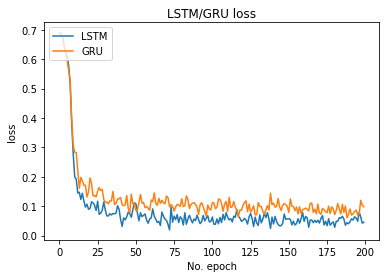

In [100]:
plt.plot(history_LSTM.history['loss'], label='LSTM')
plt.plot(history_GRU.history['loss'], label='GRU')
plt.title('LSTM/GRU loss')
plt.ylabel('loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

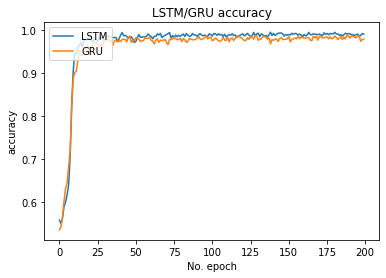

In [101]:
plt.plot(history_LSTM.history['accuracy'], label='LSTM')
plt.plot(history_GRU.history['accuracy'], label='GRU')
plt.title('LSTM/GRU accuracy')
plt.ylabel('accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

<span style="color:red">__TODO:__</span> Answer the question:

Which part of this task have you been struggling with most of the  time? Describe how you resolved it.s

<span style="color:red">__TODO:__</span> Answer the question:

Which loss function did you use? Why?

## Part 3 :  Build your own LSTMCell (25%)

In this part, you need to build your own LSTM Cell to achieve the LSTM functionality (including different types of gates that constitute the cell).

It is recommanded to see the course slides and [`LSTM` source code](https://github.com/keras-team/keras/blob/v2.10.0/keras/layers/rnn/lstm.py). [This link](https://colah.github.io/posts/2015-08-Understanding-LSTMs) also provides a good intuition. 

![](./img/lstm_cell.png)

**Note that this is a simplified figure and not all operations are illustrated.** Please refer to the lectures and follow the equations. 

Assume some **old** carry state $c_{t-1}$ and hidden state $h_{t-1}$, we try to compute the **new states** given some input $X_t$ using the ideas of LSTM. 

Remember that for an LSTM cell, we actually have (yellow boxes from left to right) a **forget gate**, an **input gate**, a **cell** and an **output gate**, whose output can be denoted by $f_{t-1}$, $i_{t-1}$, $\tilde{c}_{t-1}$ and $o_{t-1}$. Each yellow box in the graph denotes a linear projection followed by a particular activation (`sigmoid` or `tanh`). 

Then for some input $X_t \in R^{N \times D}$ and a target output dimension $K$ (also called "units"), let's first combine the inputs with the old hidden state $h_{t-1} \in R^{N \times K}$ by projecting them into the same dimension 

$$
Z_t = X_t + h_{t-1} W_h
$$

where $W_h \in R^{K \times D}$. Then all new states can be computed one by one as 

$$
\begin{cases}
f_t = \sigma (Z_t W_f) \\
i_t = \sigma (Z_t W_i) \\
\tilde{c}_t = \tanh (Z_t W_c) \\
o_t = \sigma (Z_t W_o)
\end{cases}
$$

where the weights (also called kernels)

$$
W_f, W_i, W_c, W_o \in R^{D \times K}
$$

Then the **new** carry state is given by the **old carry state** passing through the forget gate and combining with the input

$$
c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t
$$

And the hidden state is given by the **new carry state** passing through the output gate

$$
h_t = o_t \odot \tanh (c_t)
$$

Note that when computing each state, we are actually computing the four linear projections on $Z_t$, which is **four** projections on $X_t$ and **eight** (becuase of the $W_h$) projections on $h_{t-1}$. This doesn't look smart enough, so let's rewrite the equations. 

First define a kernel $W \in R^{D \times 4 K}$, which can be thought of as

$$
W \gets [W_f, W_i, W_c, W_o]
$$

Similarly define a recurrent kernel $W_r \in R^{K \times 4 K}$, which is equivalent to 

$$
W_r \gets W_h W = [W_h W_f, W_h W_i, W_h W_c, W_h W_o]
$$


We can, of course, also add a bias $b \in R^{4 K}$, and now all the projections simplifies to 

$$
Z_t = X_t W + h_{t-1} W_r + \mathbb{1} b^T \in R^{N \times 4 K}
$$

We do exactly **one** projection on $X_t$ and **one** on $h_{t-1}$. Then we partition $Z_t$ into 

$$
[z_t^f, z_t^i, z_t^c, z_t^o] \gets Z_t, \quad
z_t^* \in R^{N \times K}
$$

Easily, 

$$
\begin{cases}
f_t = \sigma (z_t^f) \\
i_t = \sigma (z_t^i) \\
\tilde{c}_t = \tanh (z_t^c) \\
o_t = \sigma (z_t^o)
\end{cases}
$$

And the rest stays the same. 

<span style="color:red">__TODO:__</span> 

1. Complete the model `LSTMCell` in **utils/LSTM.py**
2. Verify the function with Tensorflow by running the provided code

<span style="color:red">__NOTE:__</span> 

You should use the "simplified" (second) set of equations as tensorflow does. 

In [5]:
from utils.LSTM import LSTMCell

batch_size = 4
input_dim = 8
units = 64

inputs = tf.random.normal((batch_size, input_dim))
states = [tf.random.normal((batch_size, units)), tf.zeros((batch_size, units))]

In [7]:
inputs.shape

TensorShape([4, 8])

In [29]:
# Veirification Code
# Please don't change anything

from utils.LSTM import LSTMCell

batch_size = 4
input_dim = 8
units = 64

inputs = tf.random.normal((batch_size, input_dim))
states = [tf.random.normal((batch_size, units)), tf.zeros((batch_size, units))]

# By default, the weights will be initialized randomly (as is specified in the code). 
# Here we try to enforce deterministic (non-random) initializers 
# so that the two results can be correctly compared. 
# NOTE: You should NOT do this and leave them to default during actual training

lstm_cell = LSTMCell(
    units, 
    kernel_initializer=tf.keras.initializers.Ones, 
    recurrent_initializer=tf.keras.initializers.Ones, 
    bias_initializer=tf.keras.initializers.Zeros
)
h, (_, c) = lstm_cell(inputs, states)

lstm_cell_tf = tf.keras.layers.LSTMCell(
    units, 
    kernel_initializer='ones', 
    recurrent_initializer='ones', 
    bias_initializer='zeros'
)
h_tf, (_, c_tf) = lstm_cell_tf(inputs, states)

print('Simple verification:')
print('Is h correct?', np.allclose(h.numpy(), h_tf.numpy()))
print('Is c correct?', np.allclose(c.numpy(), c_tf.numpy()))

Simple verification:
Is h correct? True
Is c correct? True


In [30]:
inputs.shape

TensorShape([4, 8])

In [16]:
in_data, out_data = create_xor_dataset(1024)# create a dataset with a batch size of 1000

In [31]:
in_data.shape

(1000, 8, 1)

#### Hint on building a model with your own LSTMCell

When creating an RNN with your own custom cell, you can just plug in your `LSTMCell` as a building block into a basic `RNN` layer, specify other parameters (e.g. input_shape) as needed, and add it into your model as you did with other layers before. 

```
self.rnn = tf.keras.layers.RNN([YOUR_CELL], **OTHER_ARGS)
```

For details, please refer to https://www.tensorflow.org/guide/keras/rnn. 

<span style="color:red">__TODO:__</span> Complete the model `LSTMModel` in **utils/LSTM.py**

<span style="color:red">__NOTE:__</span> 

We are trying to use a custom layer (our `LSTMCell`) with multiple `call` arguments ("inputs" and "states"). The pre-building of these types of models is currently NOT allowed in tensorflow. 

So be sure NOT to call `model.summary()`. Compile and fit it directly and the building will be automatically done in runtime. 

<span style="color:red">__TODO:__</span> Train your `LSTMModel`

In [96]:
from utils.LSTM import LSTMModel

###################################################
# TODO: Instantiate your own model and train it.  #
###################################################
batch_size = 4
units = 64
output_dim = 1
input_shape = (8, 1)
activation = 'tanh'
model = LSTMModel(units, output_dim, activation, input_shape)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])
history = model.fit(in_data, out_data, batch_size=5, epochs=70, validation_split=0.2)
###################################################
# END TODO                                        #
###################################################

Epoch 1/70
160/160 [==============================] - 3s 8ms/step - loss: 0.7012 - accuracy: 0.0787 - val_loss: 0.6951 - val_accuracy: 0.0200
Epoch 2/70
160/160 [==============================] - 1s 5ms/step - loss: 0.6963 - accuracy: 0.1112 - val_loss: 0.6974 - val_accuracy: 0.0200
Epoch 3/70
160/160 [==============================] - 1s 5ms/step - loss: 0.6966 - accuracy: 0.1312 - val_loss: 0.6976 - val_accuracy: 0.0200
Epoch 4/70
160/160 [==============================] - 1s 5ms/step - loss: 0.6960 - accuracy: 0.0613 - val_loss: 0.6965 - val_accuracy: 0.1150
Epoch 5/70
160/160 [==============================] - 1s 5ms/step - loss: 0.6979 - accuracy: 0.0475 - val_loss: 0.6959 - val_accuracy: 0.1150
Epoch 6/70
160/160 [==============================] - 1s 5ms/step - loss: 0.6964 - accuracy: 0.0975 - val_loss: 0.6965 - val_accuracy: 0.0200
Epoch 7/70
160/160 [==============================] - 1s 5ms/step - loss: 0.6972 - accuracy: 0.1125 - val_loss: 0.7020 - val_accuracy: 0.0100
Epoch 

160/160 [==============================] - 1s 6ms/step - loss: 0.6827 - accuracy: 0.3425 - val_loss: 0.6809 - val_accuracy: 0.5100
Epoch 59/70
160/160 [==============================] - 1s 6ms/step - loss: 0.6834 - accuracy: 0.2537 - val_loss: 0.6784 - val_accuracy: 0.5350
Epoch 60/70
160/160 [==============================] - 1s 6ms/step - loss: 0.6813 - accuracy: 0.2925 - val_loss: 0.6867 - val_accuracy: 0.5400
Epoch 61/70
160/160 [==============================] - 1s 6ms/step - loss: 0.6830 - accuracy: 0.3050 - val_loss: 0.6800 - val_accuracy: 0.5450
Epoch 62/70
160/160 [==============================] - 1s 5ms/step - loss: 0.6822 - accuracy: 0.3587 - val_loss: 0.6794 - val_accuracy: 0.5300
Epoch 63/70
160/160 [==============================] - 1s 6ms/step - loss: 0.6807 - accuracy: 0.2887 - val_loss: 0.6817 - val_accuracy: 0.0550
Epoch 64/70
160/160 [==============================] - 1s 6ms/step - loss: 0.6826 - accuracy: 0.2562 - val_loss: 0.6849 - val_accuracy: 0.0150
Epoch 65/70

### Visualize loss and accuracy

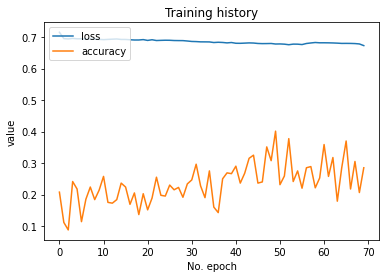

In [93]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Training history')
plt.ylabel('value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()